## Import the useful modules

The python functions must be *imported* from modules before called in a program.

A command starts with '```%```' is called a magic command, according to documentatiton:

>Magics are specific to and provided by the IPython kernel. Whether magics are available on a kernel is a decision that is made by the kernel developer on a per-kernel basis. 

In our case, the 

> ```%matplotlib inline```

command will enable Jupyter notebook to show plots generated by matplotlib directly in the notebook

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the friendly manual

When in trouble, always start with reading the well written manual/documentations, you'll be surprised how informative they are.

We use Gausian distribution as an example:

Type 

> ```?someFancyPythonCommand``` 

in a code cell and excute it, the manual will pops out

In [2]:
?stats.norm

In [3]:
?stats.norm.cdf

## Search engine is your friend

Search "theCommandYouWantToLearn" plus "documentation" can always bring you to the right page

## Compute the value of CDF and PDF at some $x$

According to documentations, the location (loc) keyword specifies the mean $\mu$. The scale (scale) keyword specifies the standard deviation $\sigma$.

By default, loc = 0, scale = 1

Each function is called a *method*

Compute CDF at $x = 3$, $\mu = 0$, $\sigma = 1$

In [4]:
stats.norm.cdf(x=3)

0.9986501019683699

Compute PDF at $x = 0.4$, $\mu = 1$, $\sigma = 0.5$

In [5]:
stats.norm.pdf(x=0.4, loc=1, scale=0.5)

0.38837210996642596

Compute SF (survival function) at $x = 0, 0.1, ... , 0.9, 1$, $\mu = 0.5$, $\sigma = 2$

In [6]:
stats.norm.sf(x=np.linspace(0, 1, 11), loc=0.5, scale=2)

array([ 0.59870633,  0.57925971,  0.55961769,  0.53982784,  0.51993881,
        0.5       ,  0.48006119,  0.46017216,  0.44038231,  0.42074029,
        0.40129367])

### A short list of methods in ```scipy.stats.norm```

|method|discription|
|---|---|
|pdf|Probability density function.|
|cdf|Cumulative distribution function.|
|mean|Mean of the distribution.|
|var|Variance of the distribution.|
|std|Standard deviation of the distribution.|
|median|Median of the distribution.|
|sf |Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).|
|ppf|Percent point function (inverse of cdf — percentiles).|
|fit|Parameter estimates for generic data.|


Full list can be found at:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Most of them also work for other continuous distributions

### Example for discrete random variables

> ```scipy.stats.poisson```

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

In [7]:
stats.poisson.pmf(k=1, mu=0.6, loc=0)

0.3292869816564159

### The complete list of random distributions in ```scipy.stats```

http://docs.scipy.org/doc/scipy/reference/stats.html

## Draw the PDF and CDF of normal distribution

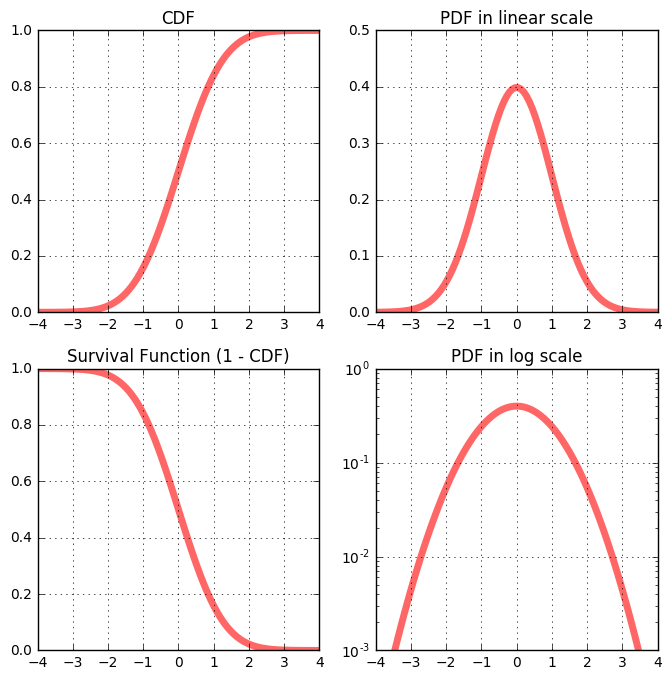

In [8]:
# make up some data in the interval ]0, 1[
x = np.linspace(-4, 4, 100)
cdf = stats.norm.cdf(x)
pdf = stats.norm.pdf(x)
sf = stats.norm.sf(x)

plt.figure(figsize=([8, 8]))

# Draw CDF
plt.subplot(221)
plt.plot(x, cdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('CDF')
plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.grid(True)

# Draw PDF linear
plt.subplot(222)
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('PDF in linear scale')
plt.xlim([-4, 4])
plt.ylim([0, 0.5])
plt.grid(True)

# Draw Survival Function
plt.subplot(223)
plt.plot(x, sf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('Survival Function (1 - CDF)')
plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.grid(True)

# Draw PDF in log scale
plt.subplot(224)
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
plt.yscale('log')
plt.title('PDF in log scale')
plt.xlim([-4, 4])
plt.ylim([10 ** -3, 1])
plt.grid(True)

## Check accuracy of CDF and PDF:

In [9]:
r = stats.norm.rvs(size=100000) # generate 100000 random numbers with normal distribution

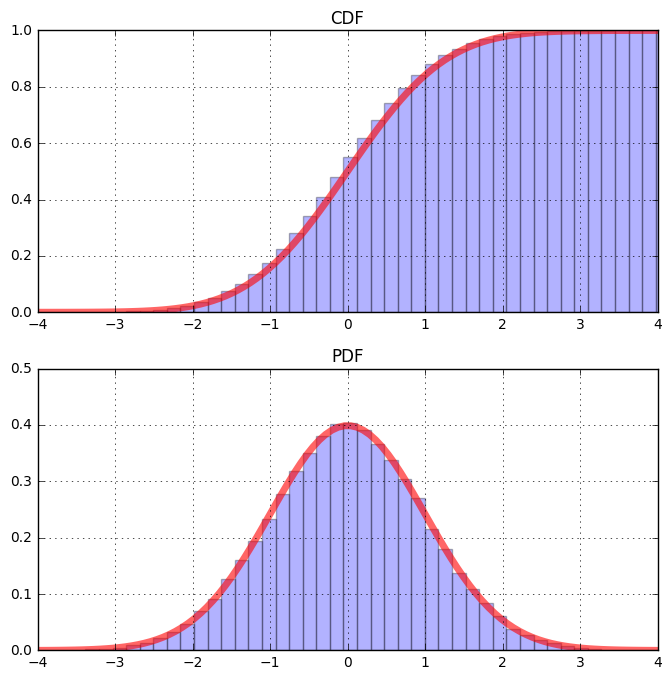

In [10]:
plt.figure(figsize=([8, 8]))

# Draw CDF
plt.subplot(211) 
plt.hist(r, bins=50, normed=True, cumulative=True, alpha=0.3, color='b') #cumulative histogram
plt.plot(x, cdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('CDF')
plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.grid(True)

# Draw PDF linear
plt.subplot(212)
plt.hist(r, bins=50, normed=True, cumulative=False, alpha=0.3, color='b')
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
plt.yscale('linear')
plt.title('PDF')
plt.xlim([-4, 4])
plt.ylim([0, 0.5])
plt.grid(True)